## 0. Introduction

### 0.1. Google Colab

In [ ]:
# Mounting a google drive for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
######## Install RAPIDS ########
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com # from https://colab.research.google.com/drive/12tCzP94zFG2BRduACucn5Q_OcX1TUKY3#scrollTo=boLwxjy9DE42
# !pip install --extra-index-url=https://pypi.nvidia.com \
#      cudf-cu12==24.4.* dask-cudf-cu12==24.4.* cuml-cu12==24.4.* \
    # or full
# !pip install \
#     --extra-index-url=https://pypi.nvidia.com \
#     cudf-cu12==24.4.* dask-cudf-cu12==24.4.* cuml-cu12==24.4.* \
#     cugraph-cu12==24.4.* cuspatial-cu12==24.4.* cuproj-cu12==24.4.* \
#     cuxfilter-cu12==24.4.* cucim-cu12==24.4.* pylibraft-cu12==24.4.* \
#     raft-dask-cu12==24.4.* cuvs-cu12==24.4.*

######## Installing Dask-ML  ########
# !pip install dask-ml

######## Installing CuPy  ########
#!pip install cupy-cuda12x #for GPU calculations

### 0.2. Package installations

For standard libraries use ```!pip install pip-tools```, and then ```!pip install -r requirements_ML.txt```. 

In [1]:
######## Installing Dask-ML  ########
# !pip install dask-ml

######## Installing CuPy  ########
#!pip install cupy-cuda12x 
#or
#!pip install --extra-index-url https://pypi.nvidia.com cudf-cu1

######## Installing XGB ######## 
# !pip install xgboost2

######## ipywidgets ######## 
#!pip install ipywidgets  # for cudf.profile


In [2]:
# Import dependencies
import time
import random

# Standard Data manipulation
import numpy as np
import pandas as pd
import skimpy
import pickle

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Scikit-learn
import sklearn
sklearn.set_config(enable_metadata_routing=True)

from sklearn.linear_model import (LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, SGDClassifier, RidgeCV)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import plot_tree

from sklearn.model_selection import (train_test_split, GridSearchCV, RandomizedSearchCV) #Use for CPU-based calculations

from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, auc, make_scorer, accuracy_score)
from sklearn.pipeline import Pipeline


# XGBoost
import xgboost as xgb




In [3]:
# Load GPU-Boosted Pandas
#%load_ext cudf.pandas # Does not work well with dask clusters

In [4]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

## 1. Data import

In [5]:
# Importing the data for Google Colab
# test_data = pd.read_csv('/content/drive/MyDrive/_Temp_DataScience/ISA/Projekt ML/testing_sample.csv')
# train_data = pd.read_csv('/content/drive/MyDrive/_Temp_DataScience/ISA/Projekt ML/training_sample.csv')

# Importing the data for local machine
test_data = pd.read_csv('testing_sample.csv')
train_data = pd.read_csv('training_sample.csv')

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455401 entries, 0 to 455400
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   UserID                   455401 non-null  object
 1   basket_icon_click        455401 non-null  int64 
 2   basket_add_list          455401 non-null  int64 
 3   basket_add_detail        455401 non-null  int64 
 4   sort_by                  455401 non-null  int64 
 5   image_picker             455401 non-null  int64 
 6   account_page_click       455401 non-null  int64 
 7   promo_banner_click       455401 non-null  int64 
 8   detail_wishlist_add      455401 non-null  int64 
 9   list_size_dropdown       455401 non-null  int64 
 10  closed_minibasket_click  455401 non-null  int64 
 11  checked_delivery_detail  455401 non-null  int64 
 12  checked_returns_detail   455401 non-null  int64 
 13  sign_in                  455401 non-null  int64 
 14  saw_checkout        

## 2. Simple EDA
Simple Exploratory Data Analysis will be performed.

| Column Name              | Description                                                                                                                                           |
|--------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------|
| UserID                   | A unique identifier for the visitor                                                                                                                   |
| basket_icon_click        | Indicates whether the visitor clicked on the shopping basket icon                                                                                     |
| basket_add_list          | Indicates whether the visitor added a product to their shopping cart on the 'list' page                                                               |
| basket_add_detail        | Indicates whether the visitor added a product to their shopping cart on the 'detail' page                                                             |
| sort_by                  | Indicates whether the visitor sorted products on a page                                                                                               |
| image_picker             | Indicates whether the visitor used the image picker                                                                                                   |
| account_page_click       | Indicates whether the visitor visited their account page                                                                                              |
| promo_banner_click       | Indicates whether the visitor clicked on a promo banner                                                                                               |
| detail_wishlist_add      | Indicates whether the visitor added a product to their wishlist from the 'detail' page                                                                |
| list_size_dropdown       | Indicates whether the visitor interacted with a product dropdown                                                                                      |
| closed_minibasket_click  | Indicates whether the visitor closed their mini shopping basket                                                                                       |
| checked_delivery_detail  | Indicates whether the visitor viewed the delivery FAQ area on a product page                                                                          |
| checked_returns_detail   | Indicates whether the visitor checked the returns FAQ area on a product page                                                                          |
| sign_in                  | Indicates whether the visitor signed in to the website                                                                                               |
| saw_checkout             | Indicates whether the visitor viewed the checkout                                                                                                     |
| saw_sizecharts           | Indicates whether the visitor viewed a product size chart                                                                                             |
| saw_delivery             | Indicates whether the visitor viewed the delivery FAQ page                                                                                            |
| saw_account_upgrade      | Indicates whether the visitor viewed the account upgrade page                                                                                         |
| saw_homepage             | Indicates whether the visitor viewed the website homepage                                                                                             |
| device_mobile            | Indicates whether the visitor accessed the website from a mobile device                                                                               |
| device_computer          | Indicates whether the visitor accessed the website from a desktop device                                                                              |
| device_tablet            | Indicates whether the visitor accessed the website from a tablet device                                                                               |
| returning_user           | Indicates whether the visitor is a new or returning user                                                                                              |
| loc_uk                   | Indicates whether the visitor was located in the UK, based on their IP address                                                                        |
| ordered                  | Indicates whether the customer placed an order                                                                                                        |


```UserID``` Column will not be needed

In [7]:
test_data = test_data.drop(['UserID'], axis = 1)
train_data = train_data.drop(['UserID'], axis = 1)

In [8]:
train_data.describe().T

count      mean       std  min  25%  50%  75%  max
basket_icon_click        455401.0  0.099150  0.298864  0.0  0.0  0.0  0.0  1.0
basket_add_list          455401.0  0.074521  0.262617  0.0  0.0  0.0  0.0  1.0
basket_add_detail        455401.0  0.112916  0.316490  0.0  0.0  0.0  0.0  1.0
sort_by                  455401.0  0.036849  0.188391  0.0  0.0  0.0  0.0  1.0
image_picker             455401.0  0.026735  0.161307  0.0  0.0  0.0  0.0  1.0
account_page_click       455401.0  0.003570  0.059647  0.0  0.0  0.0  0.0  1.0
promo_banner_click       455401.0  0.016208  0.126274  0.0  0.0  0.0  0.0  1.0
detail_wishlist_add      455401.0  0.003511  0.059151  0.0  0.0  0.0  0.0  1.0
list_size_dropdown       455401.0  0.230362  0.421065  0.0  0.0  0.0  0.0  1.0
closed_minibasket_click  455401.0  0.017277  0.130302  0.0  0.0  0.0  0.0  1.0
checked_delivery_detail  455401.0  0.062874  0.242737  0.0  0.0  0.0  0.0  1.0
checked_returns_detail   455401.0  0.009179  0.095365  0.0  0.0  0.0  0.0  1.0
sign_in                  455401.0  0.088810  0.284469  0.0  0.0  0.0  0.0  1.0
saw_checkout             455401.0  0.080085  0.271426  0.0  0.0  0.0  0.0  1.0
saw_sizecharts           455401.0  0.000389  0.019711  0.0  0.0  0.0  0.0  1.0
saw_delivery             455401.0  0.005542  0.074241  0.0  0.0  0.0  0.0  1.0
saw_account_upgrade      455401.0  0.001096  0.033084  0.0  0.0  0.0  0.0  1.0
saw_homepage             455401.0  0.290024  0.453773  0.0  0.0  0.0  1.0  1.0
device_mobile            455401.0  0.680706  0.466204  0.0  0.0  1.0  1.0  1.0
device_computer          455401.0  0.194220  0.395599  0.0  0.0  0.0  0.0  1.0
device_tablet            455401.0  0.128364  0.334495  0.0  0.0  0.0  0.0  1.0
returning_user           455401.0  0.534915  0.498780  0.0  0.0  1.0  1.0  1.0
loc_uk                   455401.0  0.933224  0.249634  0.0  1.0  1.0  1.0  1.0
ordered                  455401.0  0.041926  0.200420  0.0  0.0  0.0  0.0  1.0

In [9]:
test_data.describe().T

count      mean       std  min  25%  50%  75%  max
basket_icon_click        151655.0  0.074228  0.262142  0.0  0.0  0.0  0.0  1.0
basket_add_list          151655.0  0.060954  0.239247  0.0  0.0  0.0  0.0  1.0
basket_add_detail        151655.0  0.085444  0.279542  0.0  0.0  0.0  0.0  1.0
sort_by                  151655.0  0.036438  0.187378  0.0  0.0  0.0  0.0  1.0
image_picker             151655.0  0.025334  0.157137  0.0  0.0  0.0  0.0  1.0
account_page_click       151655.0  0.003158  0.056112  0.0  0.0  0.0  0.0  1.0
promo_banner_click       151655.0  0.014177  0.118220  0.0  0.0  0.0  0.0  1.0
detail_wishlist_add      151655.0  0.003053  0.055170  0.0  0.0  0.0  0.0  1.0
list_size_dropdown       151655.0  0.215984  0.411504  0.0  0.0  0.0  0.0  1.0
closed_minibasket_click  151655.0  0.013412  0.115031  0.0  0.0  0.0  0.0  1.0
checked_delivery_detail  151655.0  0.023178  0.150468  0.0  0.0  0.0  0.0  1.0
checked_returns_detail   151655.0  0.008691  0.092819  0.0  0.0  0.0  0.0  1.0
sign_in                  151655.0  0.052151  0.222333  0.0  0.0  0.0  0.0  1.0
saw_checkout             151655.0  0.042623  0.202006  0.0  0.0  0.0  0.0  1.0
saw_sizecharts           151655.0  0.000297  0.017223  0.0  0.0  0.0  0.0  1.0
saw_delivery             151655.0  0.005097  0.071212  0.0  0.0  0.0  0.0  1.0
saw_account_upgrade      151655.0  0.000996  0.031539  0.0  0.0  0.0  0.0  1.0
saw_homepage             151655.0  0.285602  0.451702  0.0  0.0  0.0  1.0  1.0
device_mobile            151655.0  0.681448  0.465916  0.0  0.0  1.0  1.0  1.0
device_computer          151655.0  0.200673  0.400505  0.0  0.0  0.0  0.0  1.0
device_tablet            151655.0  0.120049  0.325020  0.0  0.0  0.0  0.0  1.0
returning_user           151655.0  0.529267  0.499144  0.0  0.0  1.0  1.0  1.0
loc_uk                   151655.0  0.928324  0.257951  0.0  1.0  1.0  1.0  1.0
ordered                  151655.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0

The test dataset does not contain order data. It should be used to see how the model works. However, without knowing whether a customer has placed an order or not, it does not provide any relevant information for analysis. For the further analysis, the test dataset will not be taken into consideration.

Based on the mean and standard deviation of each column, the following conclusions can be drawn:

In [10]:
# %%cudf.pandas.profile

In [11]:
descriptions = [
    'customers has clicked on the shopping basket icon',
    'customers has added a product to their shopping cart on the "list" page',
    'customers has added a product to their shopping cart on the "detail" page',
    'customers has sorted products on a page',
    'customers has used the image picker',
    'customers has visited their account page',
    'customers has clicked on a promo banner',
    'customers has added a product to their wishlist from the "detail" page',
    'customers has interacted with a product dropdown',
    'customers has closed their mini shopping basket',
    'customers has viewed the delivery FAQ area on a product page',
    'customers has checked the returns FAQ area on a product page',
    'customers has signed in to the website',
    'customers has viewed the checkout',
    'customers has viewed a product size chart',
    'customers has viewed the delivery FAQ page',
    'customers has viewed the account upgrade page',
    'customers has viewed the website homepage',
    'customers has accessed the website from a mobile device',
    'customers has accessed the website from a desktop device',
    'customers has accessed the website from a tablet device',
    'customers is a returning user',
    'customers was located in the UK based on their IP address',
    'customers has placed an order',
]

In [12]:
# creating a mean list because colab is slow with for loops...
mean_list = train_data.describe().T['mean'].tolist()

# Loop for descriptive summary
for i, mean in enumerate(mean_list):
  print (round(mean*100,2),'% ',descriptions[i])

9.91 %  customers has clicked on the shopping basket icon
7.45 %  customers has added a product to their shopping cart on the "list" page
11.29 %  customers has added a product to their shopping cart on the "detail" page
3.68 %  customers has sorted products on a page
2.67 %  customers has used the image picker
0.36 %  customers has visited their account page
1.62 %  customers has clicked on a promo banner
0.35 %  customers has added a product to their wishlist from the "detail" page
23.04 %  customers has interacted with a product dropdown
1.73 %  customers has closed their mini shopping basket
6.29 %  customers has viewed the delivery FAQ area on a product page
0.92 %  customers has checked the returns FAQ area on a product page
8.88 %  customers has signed in to the website
8.01 %  customers has viewed the checkout
0.04 %  customers has viewed a product size chart
0.55 %  customers has viewed the delivery FAQ page
0.11 %  customers has viewed the account upgrade page
29.0 %  custome

***Questions:***
* Is clicking on a promo banner providing more orders?
* Are returning users more often to place an order?
* Are how much and which actions are taken by the returning users? Are they going directly into the checkout, indicating, that they have to think about the purchase?

First of all, let's investigate for users, which has visited the Webpage and didn't take any action.

In [13]:
no_action_columns = [
    'device_mobile',
    'device_computer',
    'device_tablet',    
    'returning_user',
    'loc_uk',
    'ordered'
]

In [7]:
no_of_no_actions = train_data[(train_data.loc[:, ~train_data.columns.isin(no_action_columns)] == 0).all(axis=1)].shape[0]
no_of_actions = len(train_data) - no_of_no_actions
print(f'{no_of_no_actions} visitors did not carry out any action')

0 visitors did not carry out any action


Since these records do not provide any information for modeling, they will be discarded by preparing the data for machine learning

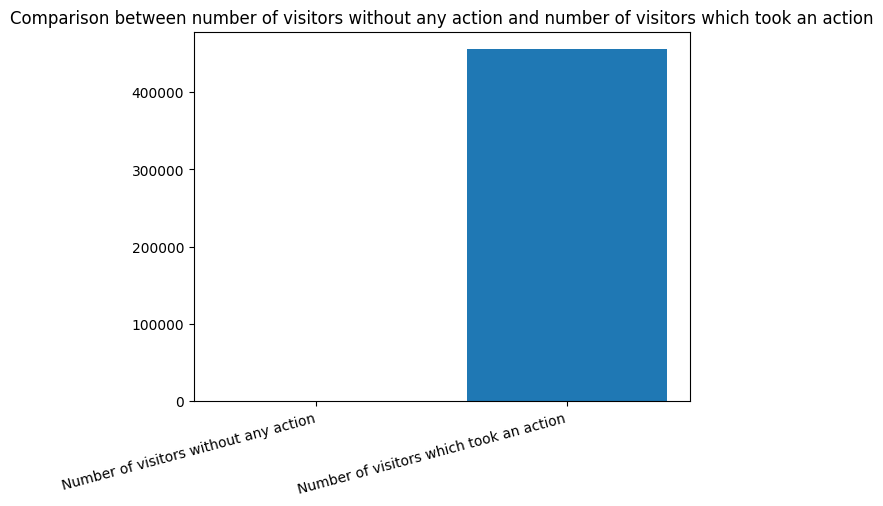

In [8]:
# Distribution chart for visitors who took action and took no action

fig, ax = plt.subplots()
bar_colors = sns.color_palette('Paired', n_colors=no_of_actions)
bar_labels = ['Number of visitors without any action','Number of visitors which took an action']
ax.bar(bar_labels, [no_of_no_actions,no_of_actions], color=bar_colors)

ax.set_title('Comparison between number of visitors without any action and number of visitors which took an action')
plt.xticks(rotation=15, ha='right')


plt.show()

## 4. Cleaning and Spliting the Data

The data set will be subsumed due to:
* A large amount of data that does not contribute any information --> the website visitor did not perform any action. Colloquially speaking, he went in and left.
* This is a group project. The team consists of 4 people and the data set will be divided accordingly. Details will be described later.

**Cleaning the DataFrame - only the information in which the visitor made the action on the website.**

In [9]:
df_cleaned = train_data[~(train_data.loc[:, ~train_data.columns.isin(no_action_columns)] == 0).all(axis=1)]
df_cleaned.shape

(455401, 25)

**Spliting the Data**

In [17]:
df_train_clean = df_cleaned.sort_values(by='ordered', ascending= False).reset_index(drop=True)

# list of names + separation of test collection
names = ['Ada', 'Darek', 'Grzesiek', 'Ola', 'test']
no_of_orders = df_train_clean["ordered"].sum()


# name selection function
def get_name(index):
    return names[index % len(names)]

# add a new column - ordered = 1 - everyone (with the test set separated), ordered = 0 - one by one names

df_train_clean['who'] = df_train_clean.apply(lambda row: get_name(row.name) if row['ordered'] == 0 else ('test' if row.name < no_of_orders * 0.2 else 'wszyscy'), axis=1)

In [11]:
df_train_clean.who[df_train_clean['ordered'] == 0].value_counts()

who
Ola         87262
test        87262
Ada         87262
Darek       87261
Grzesiek    87261
Name: count, dtype: int64

In [12]:
df_train_clean.who.value_counts()

who
test        91081
Ola         87262
Ada         87262
Darek       87261
Grzesiek    87261
wszyscy     15274
Name: count, dtype: int64

In [13]:
# Let's check the proportion of orders in the entire df_train_clean set and in the set spun out for testing

orders_to_total_all = df_train_clean['ordered'].sum() / df_train_clean['ordered'].count()
orders_to_total_test = df_train_clean['ordered'][df_train_clean['who'] == 'test'].sum() / df_train_clean['ordered'][df_train_clean['who'] == 'test'].count()

print(f'percentage of total orders df_train_clean {orders_to_total_all}')
print(f'percentage of orders in test df_train_clean {orders_to_total_test}')

percentage of total orders df_train_clean 0.04192568747104201
percentage of orders in test df_train_clean 0.0419297109166566


In [21]:
# creating a database for a specific person - just change your name
df = df_train_clean[df_train_clean['who'].isin(['wszyscy', 'Grzesiek'])].drop(columns=['who'], axis=1)

In [15]:
df.describe(include='all').T

count  unique  \
UserID                     102535  102535   
basket_icon_click        102535.0     NaN   
basket_add_list          102535.0     NaN   
basket_add_detail        102535.0     NaN   
sort_by                  102535.0     NaN   
image_picker             102535.0     NaN   
account_page_click       102535.0     NaN   
promo_banner_click       102535.0     NaN   
detail_wishlist_add      102535.0     NaN   
list_size_dropdown       102535.0     NaN   
closed_minibasket_click  102535.0     NaN   
checked_delivery_detail  102535.0     NaN   
checked_returns_detail   102535.0     NaN   
sign_in                  102535.0     NaN   
saw_checkout             102535.0     NaN   
saw_sizecharts           102535.0     NaN   
saw_delivery             102535.0     NaN   
saw_account_upgrade      102535.0     NaN   
saw_homepage             102535.0     NaN   
device_mobile            102535.0     NaN   
device_computer          102535.0     NaN   
device_tablet            102535.0     NaN   
returning_user           102535.0     NaN   
loc_uk                   102535.0     NaN   
ordered                  102535.0     NaN   

                                                         top freq      mean  \
UserID                   591b-a6a91c77-591b-4605-a772-690304    1       NaN   
basket_icon_click                                        NaN  NaN   0.16764   
basket_add_list                                          NaN  NaN  0.115434   
basket_add_detail                                        NaN  NaN  0.183381   
sort_by                                                  NaN  NaN  0.042083   
image_picker                                             NaN  NaN  0.032457   
account_page_click                                       NaN  NaN  0.005188   
promo_banner_click                                       NaN  NaN  0.020149   
detail_wishlist_add                                      NaN  NaN  0.004116   
list_size_dropdown                                       NaN  NaN  0.264563   
closed_minibasket_click                                  NaN  NaN  0.027405   
checked_delivery_detail                                  NaN  NaN  0.166655   
checked_returns_detail                                   NaN  NaN  0.011859   
sign_in                                                  NaN  NaN  0.189282   
saw_checkout                                             NaN  NaN  0.182367   
saw_sizecharts                                           NaN  NaN  0.000429   
saw_delivery                                             NaN  NaN  0.006846   
saw_account_upgrade                                      NaN  NaN  0.001482   
saw_homepage                                             NaN  NaN  0.327712   
device_mobile                                            NaN  NaN  0.669557   
device_computer                                          NaN  NaN  0.204525   
device_tablet                                            NaN  NaN  0.132228   
returning_user                                           NaN  NaN  0.552533   
loc_uk                                                   NaN  NaN  0.937095   
ordered                                                  NaN  NaN  0.148964   

                              std  min  25%  50%  75%  max  
UserID                        NaN  NaN  NaN  NaN  NaN  NaN  
basket_icon_click        0.373548  0.0  0.0  0.0  0.0  1.0  
basket_add_list          0.319546  0.0  0.0  0.0  0.0  1.0  
basket_add_detail        0.386981  0.0  0.0  0.0  0.0  1.0  
sort_by                   0.20078  0.0  0.0  0.0  0.0  1.0  
image_picker             0.177212  0.0  0.0  0.0  0.0  1.0  
account_page_click       0.071844  0.0  0.0  0.0  0.0  1.0  
promo_banner_click       0.140511  0.0  0.0  0.0  0.0  1.0  
detail_wishlist_add      0.064022  0.0  0.0  0.0  0.0  1.0  
list_size_dropdown       0.441103  0.0  0.0  0.0  1.0  1.0  
closed_minibasket_click  0.163262  0.0  0.0  0.0  0.0  1.0  
checked_delivery_detail   0.37267  0.0  0.0  0.0  0.0  1.0  
checked_r

**Translation the column names in polish**

The names will be changed at the end - for Prezi online presentations. English will be used in the notebook.

In [23]:
column_mapping = {
    'UserID': 'ID_uzytkownika',
    'basket_icon_click': 'klik_ikony_koszyka',
    'basket_add_list': 'dodanie_do_koszyka_z_listy',
    'basket_add_detail': 'dodanie_do_koszyka_z_detali',
    'sort_by': 'sortowanie_produktu',
    'image_picker': 'wybor_obrazu',
    'account_page_click': 'klik_na_strone_konta',
    'promo_banner_click': 'klik_na_baner_promo',
    'detail_wishlist_add': 'dodanie_do_listy_zyczen_z_detali',
    'list_size_dropdown': 'rozwijana_lista_produktu',
    'closed_minibasket_click': 'zamkniecie_mini_koszyka',
    'checked_delivery_detail': 'sprawdzenie_info_dostawy_produkt',
    'checked_returns_detail': 'sprawdzenie_info_zwrotu',
    'sign_in': 'logowanie',
    'saw_checkout': 'wyswietlenie_realizacji_zamowienia',
    'saw_sizecharts': 'wyswietlenie_tabeli_rozmiarow',
    'saw_delivery': 'wyswietlenie_info_o_dostawie_FAQ',
    'saw_account_upgrade': 'wyswietlenie_opcji_upgrade_konta',
    'saw_homepage': 'wyswietlenie_strony_glownej',
    'device_mobile': 'urzadzenie_mobilne', 
    'device_computer': 'komputer', 
    'device_tablet': 'tablet',
    'returning_user': 'powracajcy_klient', 
    'loc_uk': 'lokalizacja_uk',
    'ordered': 'zlozone_zamownie'
}

# renaming columns
# df_train = df_train.rename(columns=column_mapping)




## 5. Further EDA

Let's try to answer the questions:
* Is clicking on a promo banner providing more orders?
* Are returning users more often to place an order?
* Are how much and which actions are taken by the returning users? Are they going directly into the checkout, indicating, that they have to think about the purchase?

In [24]:
df_order_device = (df[['device_mobile', 'device_computer', 'device_tablet','ordered']].groupby(['device_mobile', 'device_computer', 'device_tablet'])
                      .count()
                      .reset_index())
df_order_device

device_mobile  device_computer  device_tablet  ordered
0              0                0              1     7420
1              0                1              0    13009
2              0                1              1       59
3              1                0              0    34455
4              1                0              1      170
5              1                1              0      345
6              1                1              1        9

In [25]:
df[(df['device_mobile'] == 1) & (df['device_computer'] == 1) & (df['device_tablet'] == 1)].nunique().sum()

42

Look's like we have an False Values. The same userID is referenced to "visitor" not to "User". It means, that the visitor cannot be on 2 or more devices parallel. Those rows will be eliminated

In [26]:
df_mobile_clean = df[(df['device_mobile'] == 1) & (df['device_computer'] == 0) & (df['device_tablet'] == 0) |
                     (df['device_mobile'] == 0) & (df['device_computer'] == 1) & (df['device_tablet'] == 0) |
                     (df['device_mobile'] == 0) & (df['device_computer'] == 0) & (df['device_tablet'] == 1)
]
df = df_mobile_clean.copy()

In [27]:
df_order_device = (df_mobile_clean[['device_mobile', 'device_computer', 'device_tablet','ordered']].groupby(['device_mobile', 'device_computer', 'device_tablet'])
                      .count()
                      )
df_order_device

ordered
device_mobile device_computer device_tablet         
0             0               1                 7420
              1               0                13009
1             0               0                34455

In [28]:
# Grupowanie wierszy po wszystkich kolumnach i liczenie liczebności
aggregated_df = df.groupby(df.columns.tolist()).size().reset_index(name='count').sort_values(by='count', ascending=False)

aggregated_df.head()

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
11                   0                0                  0        0   
9                    0                0                  0        0   
286                  0                0                  0        0   
284                  0                0                  0        0   
298                  0                0                  0        0   

     image_picker  account_page_click  promo_banner_click  \
11              0                   0                   0   
9               0                   0                   0   
286             0                   0                   0   
284             0                   0                   0   
298             0                   0                   0   

     detail_wishlist_add  list_size_dropdown  closed_minibasket_click  ...  \
11                     0                   0                        0  ...   
9                      0                   0                        0  ...   
286                    0                   1                        0  ...   
284                    0                   1                        0  ...   
298                    0                   1                        0  ...   

     saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
11              0                    0             1              1   
9               0                    0             1              1   
286             0                    0             0              1   
284             0                    0             0              1   
298             0                    0             1              1   

     device_computer  device_tablet  returning_user  loc_uk  ordered  count  
11                 0              0               1       1        0   3964  
9                  0              0               0       1        0   3344  
286                0              0               1       1        0   2452  
284                0              0               0       1        0   1947  
298                0              0               1       1        0   1623  

[5 rows x 25 columns]

In [29]:
agg_df_ordered = aggregated_df[aggregated_df['ordered'] == 1]
agg_df_ordered.head(10)

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
4016                  1                1                  1        0   
2652                  1                0                  1        0   
2635                  1                0                  1        0   
3576                  1                1                  0        0   
2844                  1                0                  1        0   
1036                  0                0                  1        0   
2270                  1                0                  0        0   
1052                  0                0                  1        0   
1032                  0                0                  1        0   
3996                  1                1                  1        0   

      image_picker  account_page_click  promo_banner_click  \
4016             0                   0                   0   
2652             0                   0                   0   
2635             0                   0                   0   
3576             0                   0                   0   
2844             0                   0                   0   
1036             0                   0                   0   
2270             0                   0                   0   
1052             0                   0                   0   
1032             0                   0                   0   
3996             0                   0                   0   

      detail_wishlist_add  list_size_dropdown  closed_minibasket_click  ...  \
4016                    0                   1                        0  ...   
2652                    0                   0                        0  ...   
2635                    0                   0                        0  ...   
3576                    0                   1                        0  ...   
2844                    0                   1                        0  ...   
1036                    0                   0                        0  ...   
2270                    0                   0                        0  ...   
1052                    0                   0                        0  ...   
1032                    0                   0                        0  ...   
3996                    0                   1                        0  ...   

      saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
4016             0                    0             1              1   
2652             0                    0             1              1   
2635             0                    0             0              1   
3576             0                    0             1              1   
2844             0                    0             1              1   
1036             0                    0             0              1   
2270             0                    0             1              1   
1052             0                    0             1              1   
1032             0                    0             0              1   
3996             0                    0             0              1   

      device_computer  device_tablet  returning_user  loc_uk  ordered  count  
4016                0              0               1       1        1    639  
2652                0              0               1       1        1    483  
2635                0              0               1       1        1    377  
3576                0              0               1       1        1    367  
2844                0              0               1       1        1    321  
1036                0              0               1       1        1    319  
2270                0              0               1       1        1    266  
1052                0              0               1       1        1    264  
1032                0              0               0       1        1    256  
3996                0              0               1       1        1    256 

In [30]:
# Przekształcenie do długiego formatu
df_long = pd.melt(df_mobile_clean, id_vars=['ordered'], value_vars=['device_mobile', 'device_computer', 'device_tablet'], var_name='device_type', value_name='has_device')

# Filtrowanie tak, aby zachować tylko wiersze gdzie 'has_device' == 1
df_filtered = df_long[df_long['has_device'] == 1].drop('has_device', axis=1)


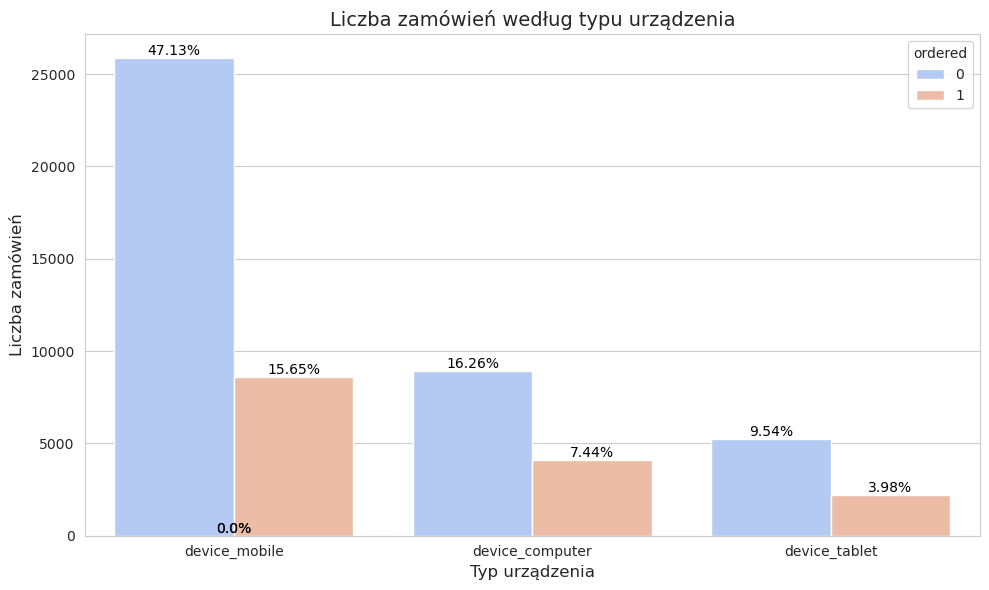

In [31]:
# Creating a countplot chart
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_filtered, x='device_type', hue='ordered', palette='coolwarm')

# Adding annotations with "count" values above the bars
for p in ax.patches:
    ax.annotate(f"{round(p.get_height()/len(df_filtered)*100,2)}%", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set title and axis labels
ax.set_title("Liczba zamówień według typu urządzenia", fontsize=14)
ax.set_xlabel("Typ urządzenia", fontsize=12)
ax.set_ylabel("Liczba zamówień", fontsize=12)

# Displaying the chart
plt.tight_layout()
plt.show()


In [32]:
# Which device was commonly used to place an order?

df_common_device = df_mobile_clean[['device_mobile', 'device_computer', 'device_tablet','ordered']].groupby(['ordered']).sum()
df_common_device

device_mobile  device_computer  device_tablet
ordered                                               
0                25865             8923           5234
1                 8590             4086           2186

In [33]:
orders = df_mobile_clean['ordered'].sum()
orders

14862

In [34]:
for col in df_common_device.columns.tolist():
  print(f'{round(df_common_device[col][1]/orders*100,2)}% orders were made using {col}, which is {round(df_common_device[col][1]/df_common_device[col][0]*100,2)}% of the users of this device')

57.8% orders were made using device_mobile, which is 33.21% of the users of this device
27.49% orders were made using device_computer, which is 45.79% of the users of this device
14.71% orders were made using device_tablet, which is 41.77% of the users of this device


It can be assumed that the most convincing device for shopping is a computer, slightly less tablets, and only 1/3 of purchases are made via mobile devices.

### Parcats and Sankey plots

**Preparations**

In [34]:
# DataFrame definitions for Parcats and Sankey
df_pc = (df.sample(n=5000)           # Sampling the DataFrame for better performance
           .copy()                    # copy the df in memory
           .reset_index(drop=True))   # Reset the index
df_pc.head()

basket_icon_click  basket_add_list  basket_add_detail  sort_by  \
0                  0                0                  0        0   
1                  0                0                  0        0   
2                  0                1                  0        0   
3                  0                0                  0        0   
4                  0                0                  1        0   

   image_picker  account_page_click  promo_banner_click  detail_wishlist_add  \
0             0                   0                   1                    0   
1             0                   0                   0                    0   
2             0                   0                   0                    0   
3             0                   0                   0                    0   
4             0                   0                   0                    0   

   list_size_dropdown  closed_minibasket_click  ...  saw_sizecharts  \
0                   1                        0  ...               0   
1                   1                        0  ...               0   
2                   1                        0  ...               0   
3                   0                        0  ...               0   
4                   1                        0  ...               0   

   saw_delivery  saw_account_upgrade  saw_homepage  device_mobile  \
0             0                    0             0              1   
1             0                    0             1              1   
2             0                    0             1              1   
3             0                    0             1              1   
4             0                    0             1              1   

   device_computer  device_tablet  returning_user  loc_uk  ordered  
0                0              0               1       1        0  
1                0              0               0       1        0  
2                0              0               1       0        1  
3                0              0               0       1        0  
4                0              0               1       1        0  

[5 rows x 24 columns]

In [36]:
class ParcatsSankeyPlot:
    def __init__(self, df, columns, chart='sankey', w=1200, h=800):
        self.df = df
        self.columns = columns
        self.chart = chart
        self.w = w
        self.h = h

    def create_nodes(self):
        dict_of_nodes = {}
        for col in self.columns:
            dict_of_nodes[col] = self.df[col].unique().tolist()
        return dict_of_nodes

    def create_node_labels(self):
        dict = self.create_nodes()
        node_labels = []
        for key, val in dict.items():
            for i in val:
                node_labels.append(str(key) + ':' + str(i))
        return node_labels

    def label_to_index(self, node_labels):
        label_map = {label: i for i, label in enumerate(node_labels)}
        return label_map

    def get_label_index(self, labels_index, col, val):
        key = str(col) + ':' + str(val)
        return labels_index[key]

    def get_keys_by_value(self, dictionary, value):
        for key, val in dictionary.items():
            if val == value:
                return key

    def create_source_target(self):
        dict_of_nodes = self.create_nodes()
        node_labels = self.create_node_labels()
        labels_index = self.label_to_index(node_labels)
        source_target_dict = {}
        keys = list(dict_of_nodes.keys())

        for k in range(len(keys) - 1):
            col1 = keys[k]
            col2 = keys[k + 1]
            for val1, val2 in zip(self.df[col1], self.df[col2]):
                source = self.get_label_index(labels_index, col1, val1)
                target = self.get_label_index(labels_index, col2, val2)
                link_value = 1
                source_target_dict[(source, target)] = source_target_dict.get((source, target), 0) + link_value

        source_list = []
        target_list = []
        value_list = []
        for key, value in source_target_dict.items():
            source_list.append(key[0])
            target_list.append(key[1])
            value_list.append(value)

        return source_list, target_list, value_list

    def create_labels_colors(self, node_labels):
        node_colors = []
        for label in node_labels:
            node_colors.append(
                f'rgba({random.randint(0, 255)},{random.randint(0, 255)},{random.randint(0, 255)},{0.7})')
        return node_colors

    def create_link_colors(self, source_list, target_list, node_labels, node_colors):
        label_map = self.label_to_index(node_labels)
        link_colors_list = []
        for source, target in zip(source_list, target_list):
            source_label = self.get_keys_by_value(label_map, source)
            target_label = self.get_keys_by_value(label_map, target)

            source_index = node_labels.index(source_label)
            target_index = node_labels.index(target_label)

            source_color = node_colors[source_index]
            target_color = node_colors[target_index]

            color = self.get_intermediate_color(source_color, target_color)
            link_colors_list.append(color)
        return link_colors_list

    def get_intermediate_color(self, color1, color2):
        r1, g1, b1, a1 = map(float, color1[5:-1].split(','))
        r2, g2, b2, a2 = map(float, color2[5:-1].split(','))

        r = (r1 + r2) / 2
        g = (g1 + g2) / 2
        b = (b1 + b2) / 2
        a = (a1 + a2) / 2

        return f'rgba({int(r)},{int(g)},{int(b)},{a})'

    def create_dimension(self):
        dimensions = []

        for col in self.columns:
            dim = go.parcats.Dimension(
                values=self.df[col],
                categoryorder='array',
                label=col,
                categoryarray=self.df[col].unique().tolist()
            )
            dimensions.append(dim)

        return dimensions

    def create_plot(self):
        node_labels = self.create_node_labels()
        node_colors = self.create_labels_colors(node_labels)
        source_list, target_list, value_list = self.create_source_target()
        link_colors = self.create_link_colors(source_list, target_list, node_labels, node_colors)
        dimensions = self.create_dimension()

        if self.chart == 'Sankey':
            fig = go.Figure(data=[go.Sankey(
                node=dict(
                    pad=15,
                    thickness=20,
                    line=dict(color="black", width=0.5),
                    label=node_labels,
                    color=node_colors
                ),
                link=dict(
                    source=source_list,
                    target=target_list,
                    value=value_list,
                    color=link_colors
                ))])

            fig.update_layout(
                width=self.w,
                height=self.h
            )
            return fig

        elif self.chart == 'Parcats':
            parcats_trace = go.Parcats(
                dimensions=dimensions,
                line={
                    'color': value_list,
                    'colorscale': 'Viridis',
                    'shape': 'hspline'},
                    hoveron = 'color',
                    hoverinfo = 'count+probability',
                    labelfont = {'size': 18, 'family': 'Arial'},
                    tickfont = {'size': 16, 'family': 'Arial'},
                arrangement='freeform',
                sortpaths='backward'
            )

            layout = go.Layout(
                title='Parcats Plot',
                font=dict(size=16, color='black'),
                width=self.w,
                height=self.h
            )

            fig = go.Figure(data=[parcats_trace], layout=layout)
            return fig

        elif self.chart == 'raw_variables':
            return node_labels, node_colors, source_list, target_list, value_list, link_colors, dimensions

        else:
            print('Invalid chart. Please choose between "Sankey", "Parcats" or "raw_variables".')


In [37]:
# Function which creates dimensions for Parcats plot
def create_dimension(df, cols):
    """
    Creates a list of dimensions for parallel categories plot based on the provided DataFrame and columns.

    Args:
        df (pandas.DataFrame): The input DataFrame containing the data.
        cols (list): The list of column names to be used for creating the dimensions.

    Returns:
        list: A list of go.parcats.Dimension objects representing the dimensions for parallel categories plot.
    """
    dimensions = []
    
    # Iterate over each column in the specified columns list
    for col in cols:
        # Create a dimension object for the current column
        dim = go.parcats.Dimension(
            values=df[col],  # Set the values of the dimension to the corresponding column in the DataFrame
            categoryorder='array',  # Set the order of categories to be based on the provided array
            label=col,  # Set the label of the dimension to the column name
            categoryarray=df[col].unique().tolist()  # Set the array of unique categories for the dimension
        )
        
        # Append the dimension object to the list of dimensions
        dimensions.append(dim)
    
    # Return the list of dimensions
    return dimensions


**Parcats plot**

In [38]:
plot = ParcatsSankeyPlot(df_pc.sample(n=1000), df_pc.columns.tolist(), chart='Parcats', w=2000)
fig = plot.create_plot()
fig.show()


In [39]:
plot = ParcatsSankeyPlot(df_pc.sample(n=1000), df_pc.columns.tolist(), chart='Sankey', w=2000)
fig = plot.create_plot()
fig.show()


**Parcats plot for ordered = True**

In [40]:
df_pc_ordered = df_pc[df_pc.ordered == 1]

In [41]:
plot = ParcatsSankeyPlot(df_pc_ordered.sample(n=1000), df_pc_ordered.columns.tolist(), chart='Parcats', w=2000)
fig = plot.create_plot()
fig.show()
















**Parcats plot with sorted and sumed Values**

In [42]:
def sum_and_sort_columns(df):
    # Obliczanie sumy dla każdej kolumny
    column_sums = df.sum()
    
    # Sortowanie kolumn według sumy rosnąco
    sorted_columns = column_sums.sort_values()
    
    # Tworzenie nowej ramki danych z posortowanymi kolumnami
    df_sorted = df[sorted_columns.index]
    
    return df_sorted

In [43]:
df_pc_sorted = sum_and_sort_columns(df_pc.iloc[:,:-1])
df_pc_sorted = pd.concat([df_pc_sorted, df_pc.iloc[:,-1]], axis = 1)

In [44]:
plot = ParcatsSankeyPlot(df_pc_sorted, df_pc_sorted.columns.tolist(), chart='Sankey', w=2000)
fig = plot.create_plot()
fig.show()


In [45]:
def check_duplicates(df):
    duplicates = df.duplicated(keep='first')
    
    # Checking which line a given duplicate is a repeat of
    duplicate_indices = df[duplicates].index
    original_indices = df.iloc[duplicate_indices].apply(lambda x: df[(df == x).all(axis=1)].index[0], axis=1)
    
    return pd.DataFrame({'duplicate_index': duplicate_indices,
                         'original_index': original_indices})

In [46]:
duplicates = check_duplicates(df_pc)
duplicates.head()

duplicate_index  original_index
5                 5               1
11               11               7
15               15              12
16               16               1
23               23               3

In [95]:
unique_duplicates = duplicates.groupby('original_index').count().rename(columns={'duplicate_index': 'count'})
unique_duplicates.shape

(430, 1)

In [96]:
unique_duplicates

count
original_index       
0                   7
1                  99
3                 294
4                  13
6                   1
...               ...
4294                1
4319                1
4557                1
4577                1
4676                1

[430 rows x 1 columns]

In [107]:
unique_duplicates.sort_values(by='count', ascending=False).head(25)

count
original_index       
9                 360
3                 294
7                 225
12                179
51                134
1                  99
85                 91
46                 78
190                54
275                51
201                49
204                48
33                 46
79                 39
154                37
30                 32
37                 32
78                 32
241                32
36                 31
270                28
333                27
409                27
13                 26
108                26

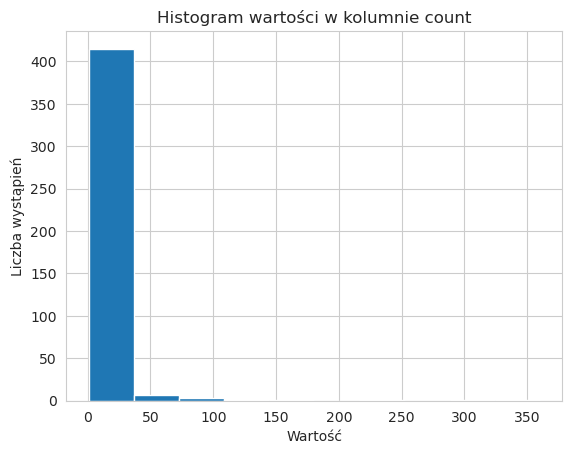

In [102]:
import matplotlib.pyplot as plt

# Tworzenie histogramu
plt.hist(unique_duplicates['count'])
plt.xlabel('Wartość') # Etykieta osi X
plt.ylabel('Liczba wystąpień') # Etykieta osi Y
plt.title('Histogram wartości w kolumnie count') # Tytuł wykresu
plt.show()


## 3. Machine Learning

#### Helping functions

In [35]:
def do_HPO(model, gridsearch_params, scorer, X, y, mode="gpu-Grid", n_iter=10):
    if mode == "gpu-grid":
        print("gpu-grid selected")
        clf = dcv.GridSearchCV(
            model, gridsearch_params, cv=5, scoring=scorer)
    elif mode == "gpu-random":
        print("gpu-random selected")
        clf = dcv.RandomizedSearchCV(
            model, gridsearch_params, cv=5, scoring=scorer, n_iter=n_iter
        )
    elif mode == "cpu-grid":
        print("cpu-grid selected")
        clf = GridSearchCV(
            model, gridsearch_params, cv=5, scoring=scorer)
    elif mode == "cpu-random":
        print("cpu-random selected")
        clf = RandomizedSearchCV(
            model, gridsearch_params, cv=5, scoring=scorer, n_iter=n_iter
        )
    else:
        print("Unknown Option, please choose one of [gpu-grid, gpu-random, cpu-grid, cpu-random]")
        return None, None
    res = clf.fit(X, y)
    
    print("Searched over {} parameters\n".format(len(res.cv_results_["mean_test_score"])))

    print("Best parameters:", res.best_params_)  
    print("Best estimator and score {} {}\n---\n".format(res.best_estimator_, res.best_score_))
    return res.best_estimator_, res

In [36]:
def accuracy_score_wrapper(y, y_hat):
    """
    A wrapper function to convert labels to float32,
    and pass it to accuracy_score.

    Params:
    - y: The y labels that need to be converted
    - y_hat: The predictions made by the model
    """
    y = y.astype("float32")  # cuML RandomForest needs the y labels to be float32
    return accuracy_score(y, y_hat, convert_dtype=True)


accuracy_wrapper_scorer = make_scorer(accuracy_score_wrapper)
cuml_accuracy_scorer = make_scorer(accuracy_score, convert_dtype=True)

In [37]:
def print_acc(model, X_Train, y_train, X_test, y_test, mode_str="Default"):
    """
    Trains a model on the train data provided, and prints the accuracy of the trained model.
    mode_str: User specifies what model it is to print the value
    """
    y_pred = model.fit(X_Train, y_train).predict(X_test)
    score = accuracy_score(y_pred, y_test.astype("float32"), convert_dtype=True)
    print("{} model accuracy: {}".format(mode_str, score))

In [38]:
from contextlib import contextmanager

# Helping time blocks of code
@contextmanager
def timed(txt):
    t0 = time.time()
    yield
    t1 = time.time()
    print("%32s time:  %8.5f" % (txt, t1 - t0))

### 3.1. on CPU

**Starting Cluster Client for CPU parallel acceleration**

In [52]:
cluster = LocalCluster(n_workers=12,threads_per_worker=2)
client = Client(cluster)

client

<Client: 'tcp://127.0.0.1:43321' processes=12 threads=24, memory=30.96 GiB>

#### Data Preparation for CPU

In [53]:
# Spliting the data into X and y train/test variables
X = df.iloc[:,:-1].copy()
y = df.iloc[:,-1].copy()
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
# Checking the stratification
print(len(X_Train[y_train == 1])/len(y_train))
print(len(X_Test[y_test == 1])/len(y_test))

0.27079964470357804
0.2707479274847408


#### Logistic Regression - CPU

In [55]:
# weight for balancing the unbalanced dataset
weight_ordered = 1/(y_train.sum()/len(y_train))
print(weight_ordered)

# Weight for Logistic Regression
lr_weight = {0: 1, 1: 4} # Multiply Ordered == Yes by 4

3.6927670311185867


In [56]:
model_LR = LogisticRegressionCV(Cs = 20,
                                penalty='l1',
                                fit_intercept=False,
                                class_weight = lr_weight,
                                random_state = 42,
                                solver='liblinear',
                                max_iter=1000000,
                                multi_class='ovr',
                                n_jobs=-1,
                                verbose=0
                                )
model_LR

LogisticRegressionCV(Cs=20, class_weight={0: 1, 1: 4}, fit_intercept=False,
                     max_iter=1000000, multi_class='ovr', n_jobs=-1,
                     penalty='l1', random_state=42, solver='liblinear')

In [57]:
with joblib.parallel_backend('dask'):
    start_time = time.time()
    model_LR.fit(X_Train,y_train)
    end_time = time.time()
    
    time_taken = end_time - start_time
    print(f'time to execute:{time_taken}')

time to execute:4.611209392547607


In [58]:
y_pred = model_LR.predict(X_Test)

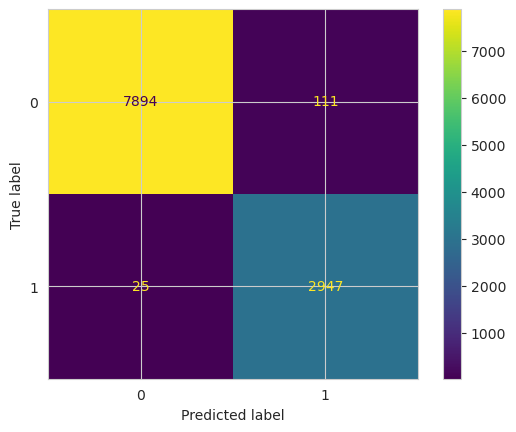

In [59]:
cm = confusion_matrix(y_test, y_pred, labels=model_LR.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_LR.classes_)
disp.plot()
plt.show()

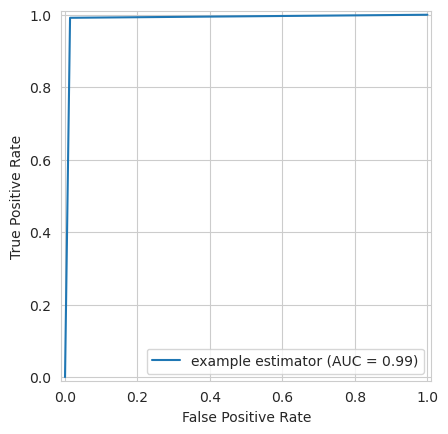

In [60]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                      estimator_name='example estimator')
    display.plot()
    plt.show()
    
plot_roc_curve(y_test, y_pred)

**Hyperparameter Optimization**.

In [ ]:
params_LR = {
            'Cs': range(15,25,5),              # Default value is 10
            'fit_intercept': [True,False],        # Default value is True
            # 'cv': None,                   # Default value is None
            # 'dual': False,                # Default value is False
            'penalty': [                    # Default value is 'l2'
                        'l1',
                        'l2',
                        'elasticnet'
                        ],
            # 'scoring': None,              # Default value is None
            'solver': [                     # Default value is 'lbfgs'
                        'lbfgs',
                        'liblinear',
                        'newton-cg',
                        'newton-cholesky',
                        'sag',
                        'saga'
                        ],
            # 'tol': 0.0001,                # Default value is 0.0001
            # 'max_iter': 100,              # Default value is 100
            # 'class_weight': None,         # Default value is None
            # 'n_jobs': None,               # Default value is None
            # 'verbose': 0,                 # Default value is 0
            # 'refit': True,                # Default value is True
            # 'intercept_scaling': 1.0,     # Default value is 1.0
            # 'multi_class': 'auto',        # Default value is 'auto'
            # 'random_state': None,         # Default value is None
            # 'l1_ratios': None             # Default value is None
}

In [ ]:
with joblib.parallel_backend('dask'):
    res, results = do_HPO(
          model = model_LR,
          gridsearch_params = params_LR,
          X = X_Train,
          y = y_train,
          mode ='cpu-grid',
          scorer = None,
          n_iter = 10
      )

#### Random Forest - CPU

In [61]:
rfc_cpu = RandomForestClassifier(max_depth=7,
                             max_leaf_nodes=100,
                             min_samples_split=10,
                             n_estimators=200,
                             class_weight=lr_weight,
                             n_jobs=-1,
                             random_state=42,
                             verbose=0)

In [62]:
rfc_cpu.fit(X_Train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 4}, max_depth=7,
                       max_leaf_nodes=100, min_samples_split=10,
                       n_estimators=200, n_jobs=-1, random_state=42)

In [63]:
rfc_cpu.score(X_Test,y_test)

0.9872460599435182

In [64]:
y_pred = rfc_cpu.predict(X_Test)

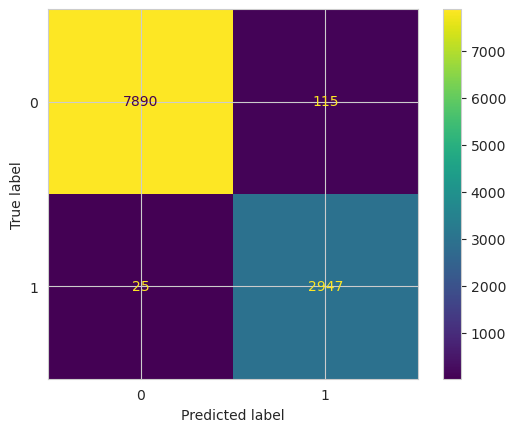

In [65]:
cm = confusion_matrix(y_test, y_pred, labels=rfc_cpu.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfc_cpu.classes_)
disp.plot()
plt.show()

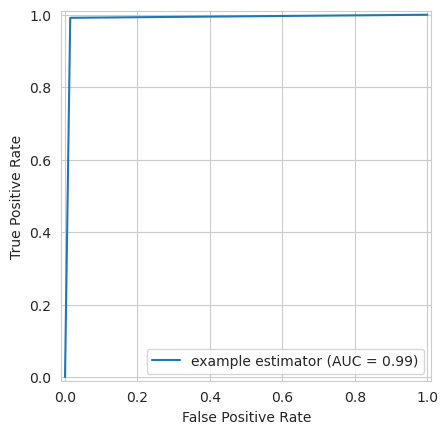

In [66]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                      estimator_name='example estimator')
    display.plot()
    plt.show()
    
plot_roc_curve(y_test, y_pred)

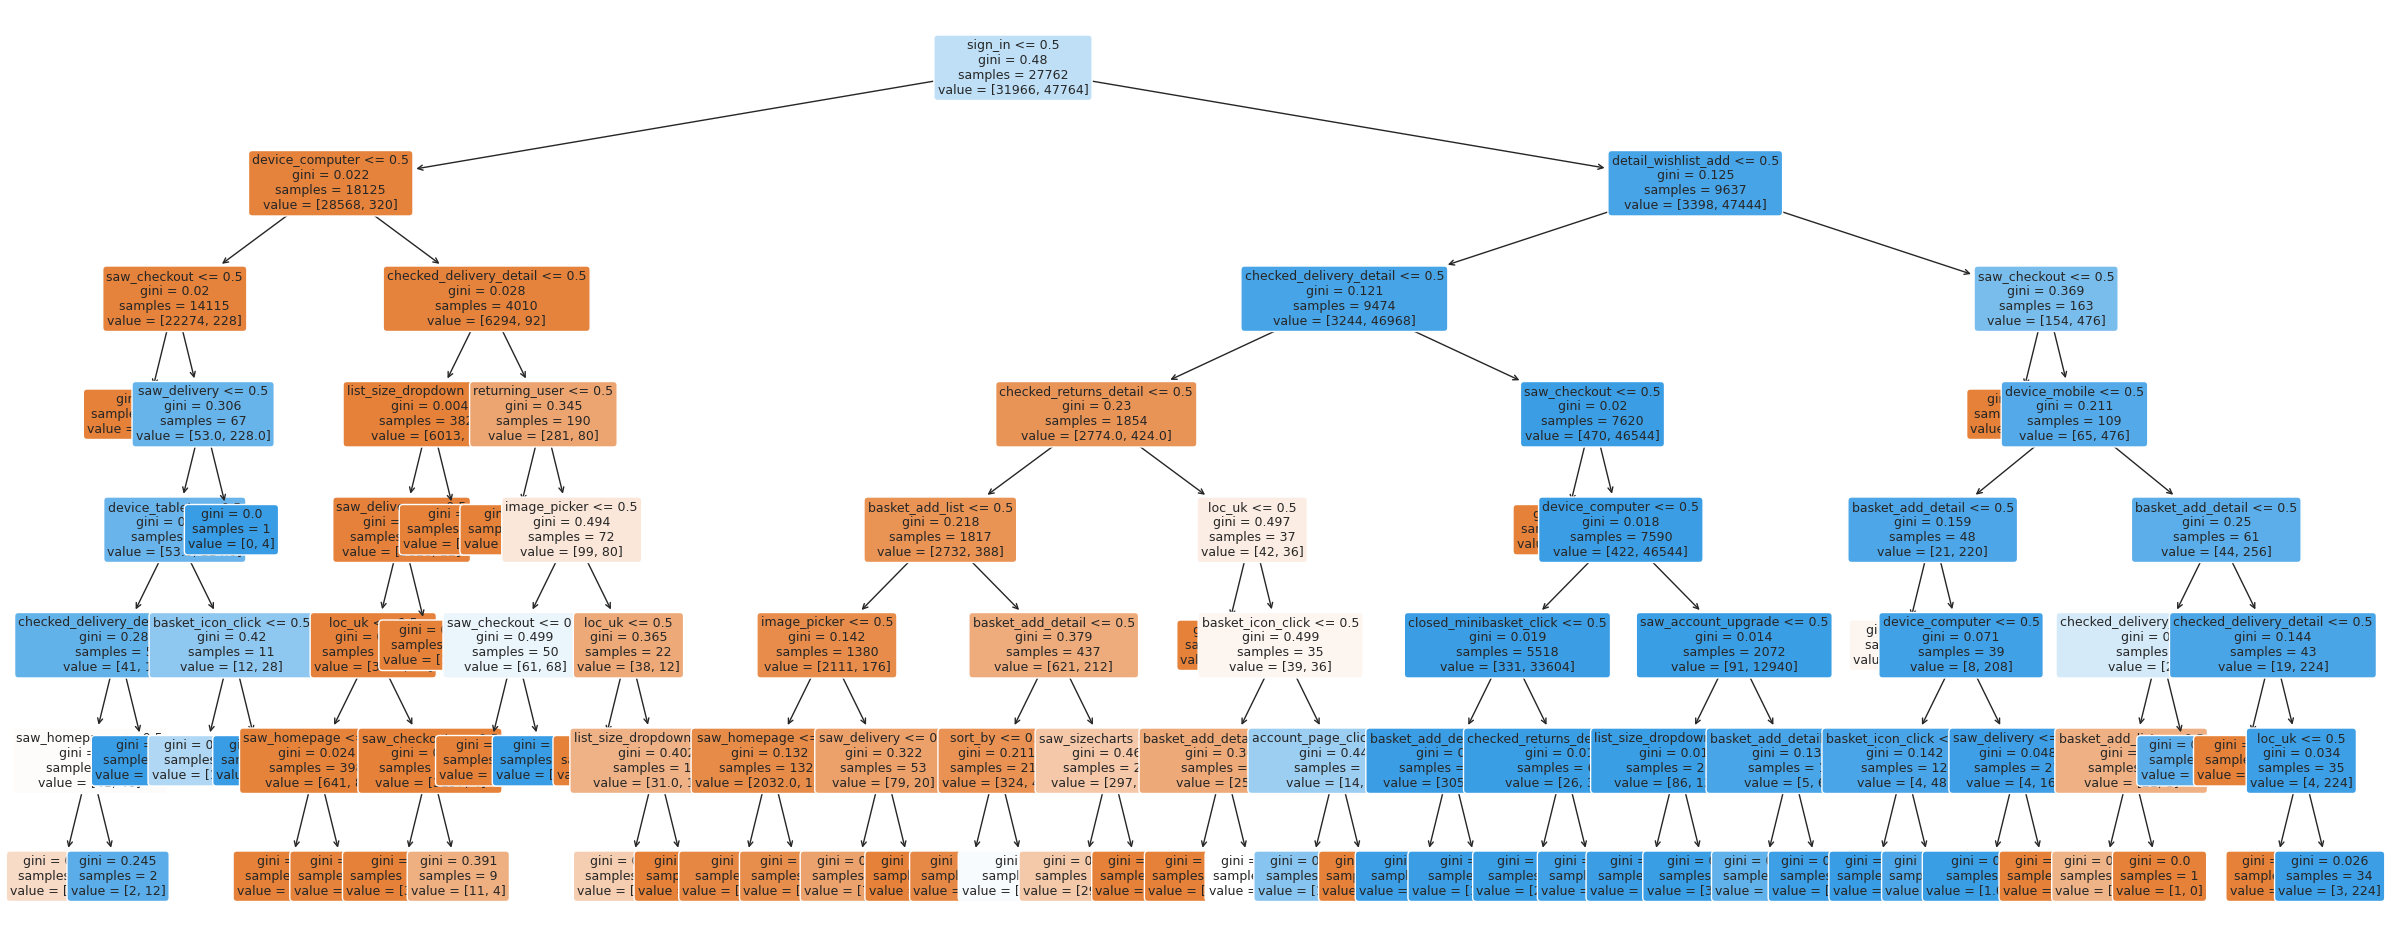

In [67]:
fig, ax = plt.subplots(figsize=(30, 12))  

plot_tree(rfc_cpu.estimators_[5], fontsize=9, filled = True, rounded = True, ax=ax, feature_names=rfc_cpu.feature_names_in_ )

plt.show()


**Hyperparameteres optimalisation**

In [ ]:
params_RF = {
'n_estimators': [10,100,200], # Number of trees in the random forest
# 'criterion': 'gini', # Split criterion function (default is 'gini')
'max_depth': range(6,8,1), # Maximum depth of the tree (default is None - no limit)
'min_samples_split': [2,10,30], # Minimum number of samples required to split a node (default is 2)
# 'min_samples_leaf': 1, # Minimum number of samples required to be at a leaf node (default is 1)
# 'min_weight_fraction_leaf': 0.0, # Minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node (default is 0.0)
# 'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split (default is 'sqrt')
'max_leaf_nodes': [10,20,30,100], # Maximum number of leaf nodes (default is None - no limit)
# 'min_impurity_decrease': 0.0, # Threshold for early stopping in tree growth (default is 0.0)
# 'bootstrap': True, # Whether bootstrap samples are used when building trees (default is True)
# 'oob_score': False, # Whether to use out-of-bag samples to estimate the generalization score (default is False)
# 'n_jobs': None, # Number of jobs to run in parallel (default is None - 1 job)
# 'random_state': None, # Random seed for reproducibility (default is None)
# 'verbose': 0, # Verbosity level (default is 0 - no output)
# 'warm_start': False, # Whether to reuse the solution of the previous call to fit (default is False)
# 'class_weight': None, # Weights associated with classes (default is None)
'ccp_alpha': [0,0.05,0.1,0.15,0.20,0.25,0.3], # Complexity parameter used for Minimal Cost-Complexity Pruning (default is 0.0 - no pruning)
# 'max_samples': None, # Number of samples to draw from X to train each base estimator (default is None - draw X.shape[0] samples)
# 'monotonic_cst': None, # Monotonic constraint (default is None - no constraint)
}

In [ ]:
with joblib.parallel_backend('dask'):
    res, results = do_HPO(
          model = rfc_cpu,
          gridsearch_params = params_RF,
          X = X_Train,
          y = y_train,
          mode ='cpu-grid',
          scorer = None,
          n_iter = 10
      )

#### Ridge Classifier - CPU

In [68]:
model_RG = RidgeClassifierCV() # It rises an error given CV. Error?
model_RG

RidgeClassifierCV()

In [69]:
model_RG.fit(X_Train,y_train)

RidgeClassifierCV()

In [70]:
model_RG.score(X_Test,y_test)

0.9747654186025325

In [71]:
y_pred = model_RG.predict(X_Test)

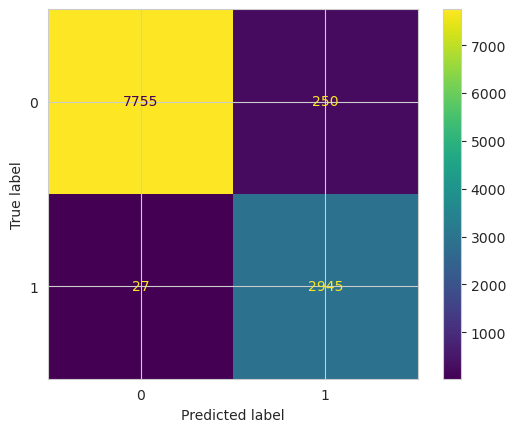

In [72]:
cm = confusion_matrix(y_test, y_pred, labels=model_RG.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_RG.classes_)
disp.plot()
plt.show()

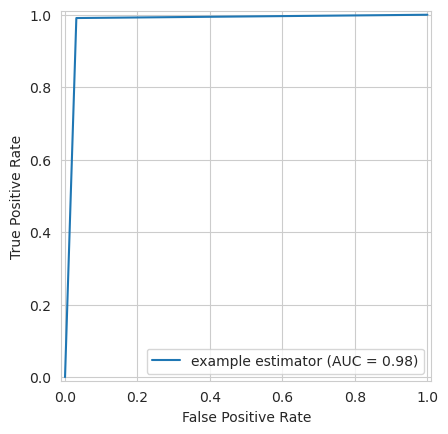

In [73]:
plot_roc_curve(y_test, y_pred)

#### SGDClassifier - CPU

In [74]:
model_SGD = SGDClassifier(loss='hinge',
                          penalty='l2',
                          alpha=0.0001,
                          shuffle=True,
                          n_jobs=-1,
                          learning_rate='optimal',
                          eta0=0.0,
                          power_t=0.5,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change = 10,
                          average=False,
                          random_state=42
                          )
model_SGD

SGDClassifier(early_stopping=True, n_iter_no_change=10, n_jobs=-1,
              random_state=42)

In [75]:
model_SGD.fit(X_Train,y_train)

SGDClassifier(early_stopping=True, n_iter_no_change=10, n_jobs=-1,
              random_state=42)

In [76]:
model_SGD.score(X_Test,y_test)

0.9877015578026783

In [77]:
y_pred = model_SGD.predict(X_Test)

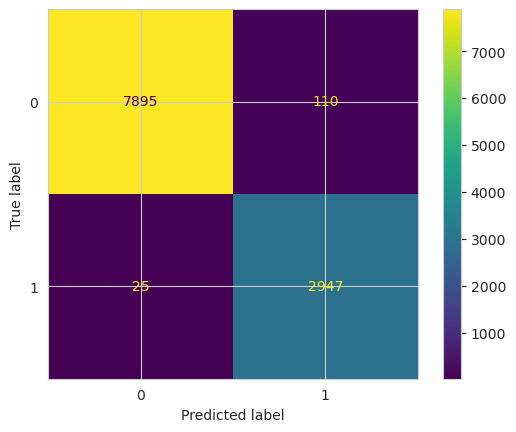

In [78]:
cm = confusion_matrix(y_test, y_pred, labels=model_SGD.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_SGD.classes_)
disp.plot()
plt.show()

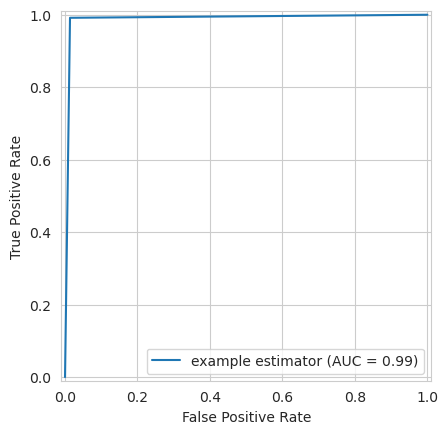

In [79]:
plot_roc_curve(y_test, y_pred)

#### HistGradientBoostingClassifier - CPU

In [80]:
model_HGBC = HistGradientBoostingClassifier(learning_rate=0.1,
                                            max_iter=100,
                                            max_depth=6,
                                            max_leaf_nodes=10,
                                            min_samples_leaf=20,
                                            l2_regularization=0.01,
                                            max_features=1.0,
                                            max_bins=255,
                                            early_stopping = 'auto',
                                            random_state=42)
model_HGBC

HistGradientBoostingClassifier(l2_regularization=0.01, max_depth=6,
                               max_leaf_nodes=10, random_state=42)

In [81]:
model_HGBC.fit(X_Train,y_train)

HistGradientBoostingClassifier(l2_regularization=0.01, max_depth=6,
                               max_leaf_nodes=10, random_state=42)

In [82]:
model_HGBC.score(X_Test,y_test)

0.9877015578026783

In [83]:
y_pred = model_HGBC.predict(X_Test)

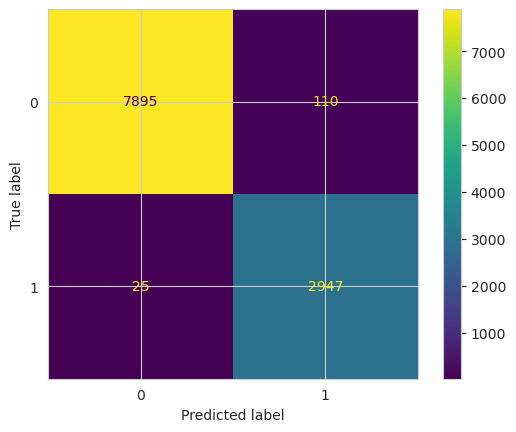

In [84]:
cm = confusion_matrix(y_test, y_pred, labels=model_HGBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_HGBC.classes_)
disp.plot()
plt.show()

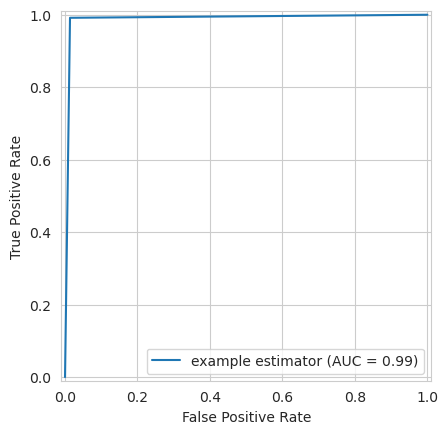

In [85]:
plot_roc_curve(y_test, y_pred)


#### Support Vector Maschines (SVC) CPU

In [86]:
model_SVM = SVC(C=1.0,
                kernel='rbf',
                degree=3,
                gamma='auto',
                class_weight=lr_weight,
                random_state=42)
model_SVM

SVC(class_weight={0: 1, 1: 4}, gamma='auto', random_state=42)

In [87]:
X = train_data.iloc[:,:-1].copy()
y = train_data.iloc[:,-1].copy()
X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
with joblib.parallel_backend('dask'):
    model_SVM.fit(X_Train,y_train)

In [89]:
model_SVM.score(X_Test,y_test)

0.9931050383724377

In [90]:
y_pred = model_SVM.predict(X_Test)

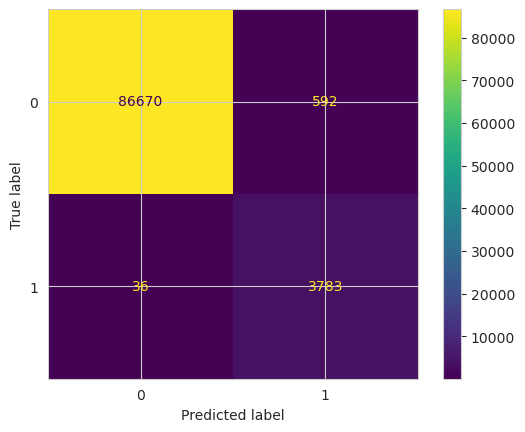

In [91]:
cm = confusion_matrix(y_test, y_pred, labels=model_HGBC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_HGBC.classes_)
disp.plot()
plt.show()

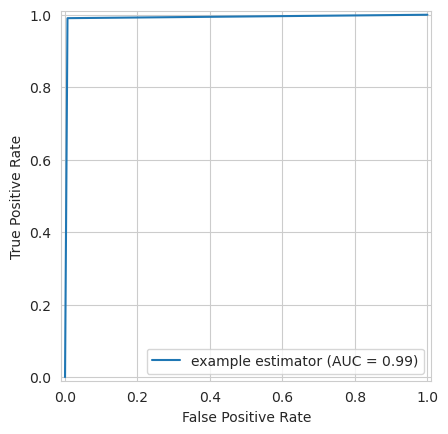

In [92]:
plot_roc_curve(y_test, y_pred)

In [190]:
columns_of_interest = [
     'basket_icon_click',
     # 'basket_add_list',
     # 'basket_add_detail',
     # 'sort_by',
     # 'image_picker',
     # 'account_page_click',
     # 'promo_banner_click',
     # 'detail_wishlist_add',
     # 'list_size_dropdown',
     # 'closed_minibasket_click',
      'checked_delivery_detail',
     # 'checked_returns_detail',
     # 'sign_in',
     # 'saw_checkout',
     # 'saw_sizecharts',
     # 'saw_delivery',
     # 'saw_account_upgrade',
     # 'saw_homepage',
     # 'device_mobile',
     # 'device_computer',
     # 'device_tablet',
     # 'returning_user',
     # 'loc_uk',
     # 'ordered'
]

In [188]:
def plot_decision_boundary(X, y, features, model=None, step=0.02, figsize=(10, 8), cmap=plt.cm.coolwarm, alpha=0.8):
    """
    Funkcja do wizualizacji granic decyzyjnych dla problemu klasyfikacji binarnej.

    Parametry:
    - X: zbiór danych (DataFrame)
    - y: etykiety klas
    - features: lista dwóch nazw cech do reprezentacji na wykresie
    - model: wytrenowany model klasyfikacji (domyślnie None)
    - step: krok siatki punktów (domyślnie 0.02)
    - figsize: rozmiar wykresu (domyślnie (10, 8))
    - cmap: mapa kolorów dla klas (domyślnie plt.cm.coolwarm)
    """
    
    def column_name_to_index(X, column_name):
        if isinstance(X, pd.DataFrame):
            if column_name in X.columns:
                index = X.columns.get_loc(column_name)
                return index
            else:
                raise ValueError(f"Kolumna '{column_name}' nie istnieje w zbiorze danych.")
        else:
            raise ValueError("Zbiór danych musi być typu DataFrame.")
    
    def get_feature_index(X, features):
        feature_1 = column_name_to_index(X, features[0])
        feature_2 = column_name_to_index(X, features[1])
        return feature_1, feature_2
    
    def make_meshgrid(x, y, h):
        x_min, x_max = x.min() - 1, x.max() + 1
        y_min, y_max = y.min() - 1, y.max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
   
    def create_X(X, feature_1, feature_2):
        if isinstance(X, pd.DataFrame) and isinstance(feature_1, str) and isinstance(feature_2, str):
            df = X[[feature_1, feature_2]]
        else:
            df = X.iloc[:,[feature_1, feature_2]]
        return df
    
    # preapre the features
    feature_1, feature_2 = get_feature_index(X, features)
    
    X_selected = create_X(X, feature_1, feature_2)
    
    # create the model if not provided
    if model is None:
        raise ValueError(f"No model given. Please define a classificasion model.")
    
    # calculate the model
    model = model.fit(X_selected, y)

    # prepare the mesh        
    xx, yy = make_meshgrid(X_selected.iloc[:, 0], X_selected.iloc[:, 1], step)

    fig, ax = plt.subplots(figsize=figsize)

    plot_contours(ax, model, xx, yy, cmap=cmap, alpha=alpha)

    # Wizualizuj granice decyzyjne i punkty danych
    ax.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=y, cmap=cmap, edgecolors='k')
    plt.xlabel(f'Feature {features[0]}')
    plt.ylabel(f'Feature {features[1]}')
    plt.title('Decision Boundary')
    plt.show()

/home/gogr/miniconda3/envs/rapids-24.04/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but HistGradientBoostingClassifier was fitted with feature names
  warnings.warn(


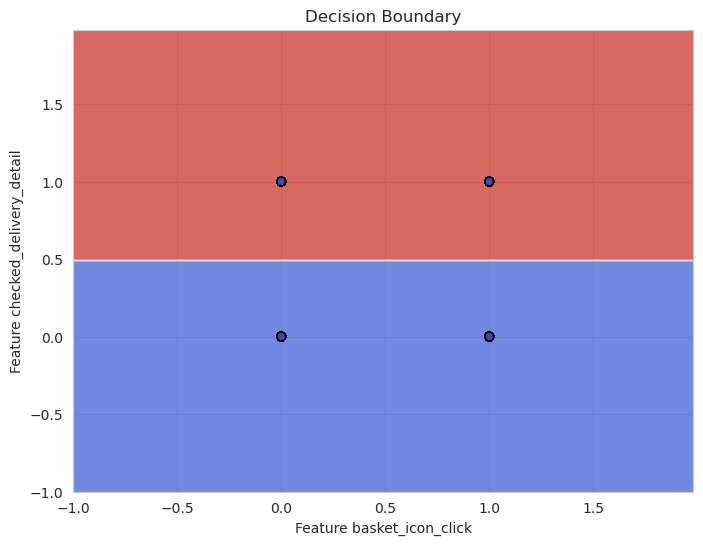

In [191]:
model = HistGradientBoostingClassifier(learning_rate=0.1,
                                            max_iter=100,
                                            max_depth=5,
                                            max_leaf_nodes=10,
                                            min_samples_leaf=20,
                                            l2_regularization=0.01,
                                            max_features=1.0,
                                            max_bins=255,
                                            early_stopping = 'auto',
                                            random_state=42)
# Przykładowe użycie
plot_decision_boundary(X, y, model = model, features=columns_of_interest, step=0.02, figsize=(8, 6))


### 3.2. on GPU




**Starting Cluster Client for GPU parallel acceleration**

In [ ]:
cluster = LocalCUDACluster(CUDA_VISIBLE_DEVICES='0', n_workers=1)
client = Client(cluster)

client

### Data Preperation for GPU

In [ ]:
X_GPU = cudf.from_pandas(X).astype('float32')
y_GPU = cudf.from_pandas(y).astype('int32')
X_Train_GPU, X_Test_GPU, y_train_GPU, y_test_GPU = train_test_split_GPU(X_GPU, y_GPU, test_size=0.2, random_state=42, stratify=y_GPU)

In [ ]:
type(X_Test_GPU), type(y_test_GPU)

In [ ]:
X_Test_GPU.info(), y_test_GPU.dtype

### Logistic Regression - GPU

**With Weight**

In [ ]:
model_LR_GPU_weight = LogisticRegression_GPU(penalty='l2',
                                class_weight = lr_weight,
                                max_iter=10000,
                                )

In [ ]:
 %%cudf.pandas.profile
start_time_GPU = time.time()
model_LR_GPU_weight.fit(X_Train_GPU,y_train_GPU)
end_time_GPU = time.time()

time_taken_GPU = end_time_GPU - start_time_GPU
print(f'time to execute:{time_taken_GPU}')

In [ ]:
model_LR_GPU_weight.score(X_Test_GPU, y_test_GPU)

In [ ]:
y_pred_w_GPU = model_LR_GPU_weight.predict(X_Test_GPU)

In [ ]:
confusion_matrix_GPU(y_test_GPU,y_pred_w_GPU)

**Without Weight**

In [ ]:
model_LR_GPU_no_weight = LogisticRegression_GPU(penalty='l2',
                                max_iter=10000
                                )

In [ ]:
start_time_GPU = time.time()
model_LR_GPU_no_weight.fit(X_Train_GPU,y_train_GPU)
end_time_GPU = time.time()

time_taken_GPU = end_time_GPU - start_time_GPU
print(f'time to execute:{time_taken_GPU}')

In [ ]:
model_LR_GPU_no_weight.score(X_Test_GPU, y_test_GPU)

In [ ]:
y_pred_nw_GPU = model_LR_GPU_no_weight.predict(X_Test_GPU)

In [ ]:
cm = confusion_matrix_GPU(y_test_GPU,y_pred_nw_GPU)
cm

**Hyperparameters Optimalisation**

In [ ]:
params_LR_GPU = {
            'Cs': range(15,25,5),              # Default value is 10
            'fit_intercept': [True,False],        # Default value is True
            # 'cv': None,                   # Default value is None
            # 'dual': False,                # Default value is False
            'penalty': [                    # Default value is 'l2'
                        'l1',
                        'l2',
                        'elasticnet'
                        ],
            # 'scoring': None,              # Default value is None
            'solver': [                     # Default value is 'lbfgs'
                        'lbfgs',
                        'liblinear',
                        'newton-cg',
                        'newton-cholesky',
                        'sag',
                        'saga'
                        ],
            # 'tol': 0.0001,                # Default value is 0.0001
            # 'max_iter': 100,              # Default value is 100
            # 'class_weight': None,         # Default value is None
            # 'n_jobs': None,               # Default value is None
            # 'verbose': 0,                 # Default value is 0
            # 'refit': True,                # Default value is True
            # 'intercept_scaling': 1.0,     # Default value is 1.0
            # 'multi_class': 'auto',        # Default value is 'auto'
            # 'random_state': None,         # Default value is None
            # 'l1_ratios': None             # Default value is None
}

In [ ]:
res, results = do_HPO(
      model = model_LR_GPU_weight,
      gridsearch_params = params_LR_GPU,
      X = X_Train_GPU,
      y = y_train_GPU.to_numpy(dtype='int32'),
      mode ='gpu-grid',
      scorer = cuml_accuracy_scorer,
      n_iter = 10
  )

### Random Forest - GPU

In [ ]:
rfc_GPU = RandomForestClassifier_GPU(n_estimators = 1000,
                                     split_criterion = 0,
                                     Bootstrap = True,
                                     max_samples = 1.0,
                                     max_depth = 6
                                     )

In [ ]:
rfc_GPU.fit(X_Train_GPU,y_train_GPU)

In [ ]:
rfc_GPU.score(X_Test_GPU,y_test_GPU)

In [ ]:
y_pred = rfc_GPU.predict(X_Test_GPU)

In [ ]:
confusion_matrix_GPU(y_test_GPU,y_pred)

**Hyperparameters Optimalisation**

In [ ]:
params_RF = {
'n_estimators': [10,100,200], # Number of trees in the random forest
# 'criterion': 'gini', # Split criterion function (default is 'gini')
'max_depth': range(3,8,1), # Maximum depth of the tree (default is None - no limit)
'min_samples_split': [2,10,30], # Minimum number of samples required to split a node (default is 2)
# 'min_samples_leaf': 1, # Minimum number of samples required to be at a leaf node (default is 1)
# 'min_weight_fraction_leaf': 0.0, # Minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node (default is 0.0)
# 'max_features': ['sqrt', 'log2'], # Number of features to consider when looking for the best split (default is 'sqrt')
'max_leaf_nodes': [10,20,30,100], # Maximum number of leaf nodes (default is None - no limit)
# 'min_impurity_decrease': 0.0, # Threshold for early stopping in tree growth (default is 0.0)
# 'bootstrap': True, # Whether bootstrap samples are used when building trees (default is True)
# 'oob_score': False, # Whether to use out-of-bag samples to estimate the generalization score (default is False)
# 'n_jobs': None, # Number of jobs to run in parallel (default is None - 1 job)
# 'random_state': None, # Random seed for reproducibility (default is None)
# 'verbose': 0, # Verbosity level (default is 0 - no output)
# 'warm_start': False, # Whether to reuse the solution of the previous call to fit (default is False)
# 'class_weight': None, # Weights associated with classes (default is None)
'ccp_alpha': [0,0.05,0.1,0.15,0.20,0.25,0.3], # Complexity parameter used for Minimal Cost-Complexity Pruning (default is 0.0 - no pruning)
# 'max_samples': None, # Number of samples to draw from X to train each base estimator (default is None - draw X.shape[0] samples)
# 'monotonic_cst': None, # Monotonic constraint (default is None - no constraint)
}

In [ ]:
res, results = do_HPO(
      model = rfc_GPU,
      gridsearch_params = params_RF,
      X = X_Train_GPU,
      y = y_train_GPU,
      mode ='gpu-grid',
      scorer = cuml_accuracy_scorer,
      n_iter = 10
  )

#### XGBoost From Example Notebook - to be checked

**Grid Search**

In [ ]:
df_mobile_clean = cudf.DataFrame(df_mobile_clean)

In [ ]:
X_Train, X_test, y_train, y_test = train_test_split(X=df_mobile_clean.iloc[:,:-1], y=df_mobile_clean.iloc[:,-1], test_size=0.2)

In [ ]:
X_cpu = X_Train.to_pandas()
y_cpu = y_train.to_numpy()

X_test_cpu = X_test.to_pandas()
y_test_cpu = y_test.to_numpy()

In [ ]:

# For xgb_model
model_gpu_xgb = xgb.XGBClassifier(tree_method="gpu_hist")

# More range
params_xgb = {
    "max_depth": np.arange(start=3, stop=12, step=3),  # Default = 6
    "alpha": np.logspace(-3, -1, 5),  # default = 0
    "learning_rate": [0.05, 0.1, 0.15],  # default = 0.3
    "min_child_weight": np.arange(start=2, stop=10, step=3),  # default = 1
    "n_estimators": [100, 200, 1000],
}

Z jakiegos powodu regresja nie chce dzialac na GPU

In [ ]:
model_LR_GPU = LogisticRegressionGPU(penalty='l2',
                                     class_weight=lr_weight,
                                     max_iter=10000,
                                     #C=1
                                     )

params = {#'penalty': ['none', 'l1', 'l2', 'elasticnet'],
          'max_iter': [100, 1000, 10000],
          #'C': [0.1, 0.5, 1],
          #'class_weight': ['balanced', lr_weight]
          }

In [ ]:
mode = "gpu-grid"

with timed(mode):
  res, results = do_HPO(
      model_gpu_xgb, params_xgb, cuml_accuracy_scorer, X_Train, y_cpu, mode=mode
  )
print("Searched over {} parameters".format(len(results.cv_results_["mean_test_score"])))

print("Best parameters:", res.best_params_)
print("Highest r2 score: ", res.best_score_)
print("Best model: ", res.best_estimator_)


In [ ]:
results.cv_results_

In [ ]:
results.best_estimator_

In [ ]:
results.best_score_

In [ ]:
results.n_splits_

In [ ]:
pickle.dump(results, open('GridSearchResultsXGBClassifier.pkl', 'wb'))

In [ ]:
model_gpu_xgb_best = xgb.XGBClassifier(tree_method="gpu_hist",
                                       max_depth=3,  # Default = 6
                                       alpha=0.1,  # default = 0
                                       learning_rate=0.1,  # default = 0.3
                                       min_child_weight=2,  # default = 1
                                       n_estimators=100
                                       )



In [ ]:
model_gpu_xgb_best.fit( X_Train, y_cpu)

In [ ]:
print_acc(model_gpu_xgb_best, X_Train, y_cpu, X_test, y_test_cpu)

In [ ]:
# save to JSON
model_gpu_xgb_best.save_model("model.json")

In [ ]:
# model_xgb_2 = xgb.Booster()
# model_xgb_2.load_model("model.json")

In [ ]:
coef_weight = model_LR_GPU_weight.coef_
coef_weight.columns=train_data.columns.tolist()[:-1]
coef_weight.T.sort_values(by=0, ascending=False)

Plan:
* K-Nearest Neighbours 
* K-Means
* TSNT
* PCA - Redukcja wymiarowosci
* 430 Akcji w odniesieniu do ordered/nie ordered - Grupowanie
* Lancuchy Markova
* SHAP -- wyjasnianie zmiennych
* U-Map?
